In [1]:
%run './model/multi_corpus.py'
%run './constants.py'

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
corpora = co_occurence_graphs(n_edges=100)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 57 nodes and 100 edges
Geometry Graph with 61 nodes and 100 edges
Geophysics Graph with 63 nodes and 100 edges
Economics Graph with 50 nodes and 100 edges
Language & Linguistics Graph with 58 nodes and 100 edges
Probability & Statistics Graph with 58 nodes and 100 edges
Material Engineering Graph with 49 nodes and 100 edges
Artificial Intelligence Graph with 49 nodes and 100 edges
Sociology Graph with 76 nodes and 100 edges
International Business Graph with 51 nodes and 100 edges
Political Science Graph with 56 nodes and 100 edges
Genetics & Genomics Graph with 71 nodes and 100 edges
Immunology Graph with 92 nodes and 100 edges
Human Resources & Organizations Graph with 66 nodes and 100 edges
Ethnic & Cultural Studies Graph with 52 nodes and 100 edges
Neurology Graph with 46 nodes and 100 edges


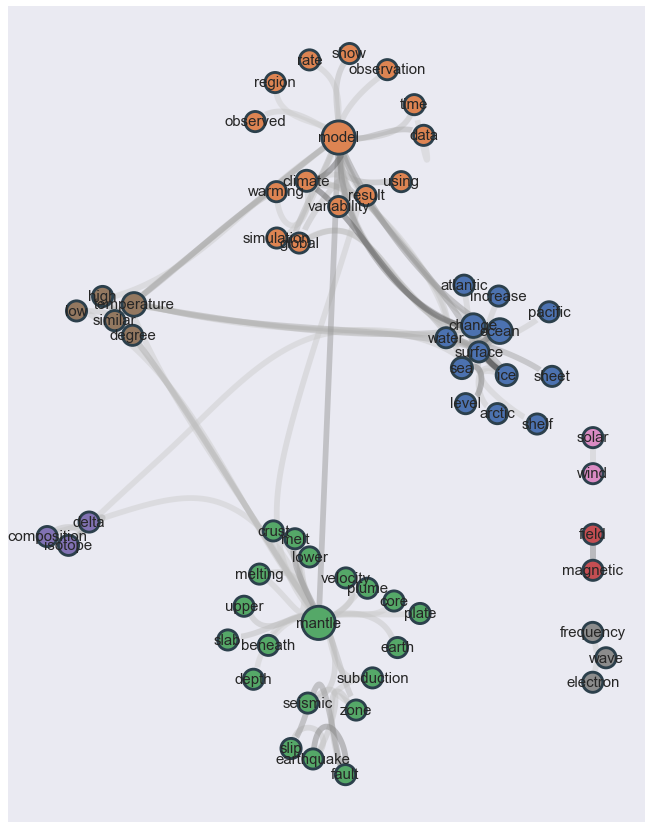

In [38]:
from netgraph import Graph, ArcDiagram
import seaborn as sns

G = Gs['Geophysics']

communities = nx_comm.louvain_communities(G)
communities = {node: i for i, comm in enumerate(communities) for node in comm}

node_size = dict(nx.degree(G))
node_size = {node: max(2, np.log(size)) for node, size in node_size.items()}

comm_color = sns.color_palette()
node_color = {node: comm_color[i] for node, i in communities.items()}

node_labels = dict(zip(G.nodes, G.nodes))

fig, ax = plt.subplots(figsize=(15,15))

Graph(
    G,
    edge_layout='bundled',
    node_layout='community',
    node_size=node_size,
    node_color=node_color,
    node_labels=True,
    node_label_fontdict={'size': 15},
    node_label_offset=0.00,
    node_layout_kwargs=dict(node_to_community=communities)
)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/netgraph/_node_layout.py:948: UserWarning: Maximum number of iterations reached. Aborting further node layout optimisations.
  warnings.warn("Maximum number of iterations reached. Aborting further node layout optimisations.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in true_divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


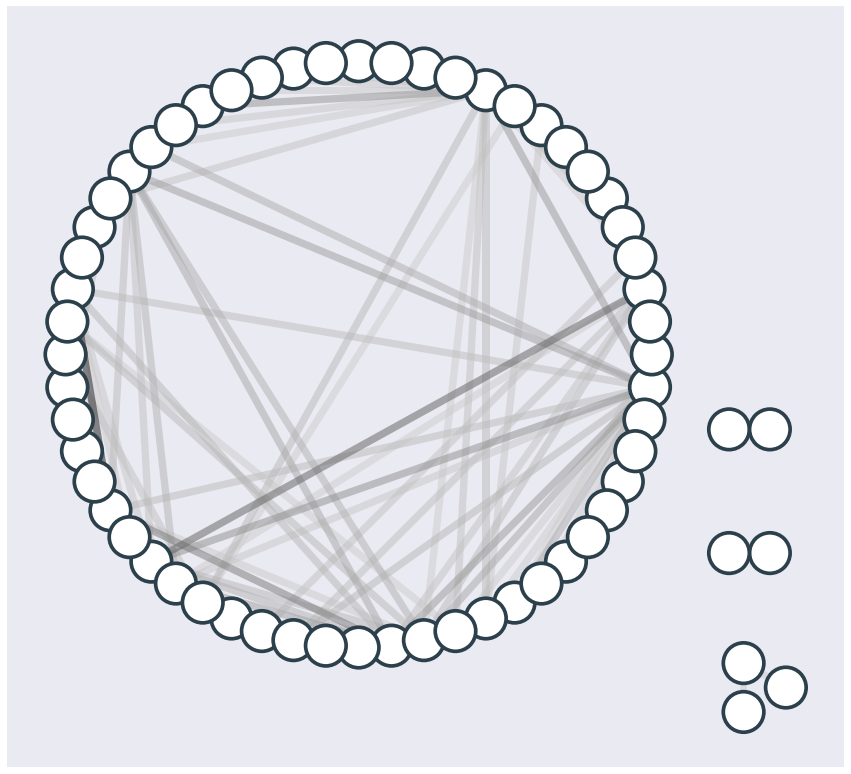

In [41]:
fig, ax = plt.subplots(figsize=(15,15))

Graph(G, node_layout='circular')

plt.show()

ValueError: special directives must be the first entry.

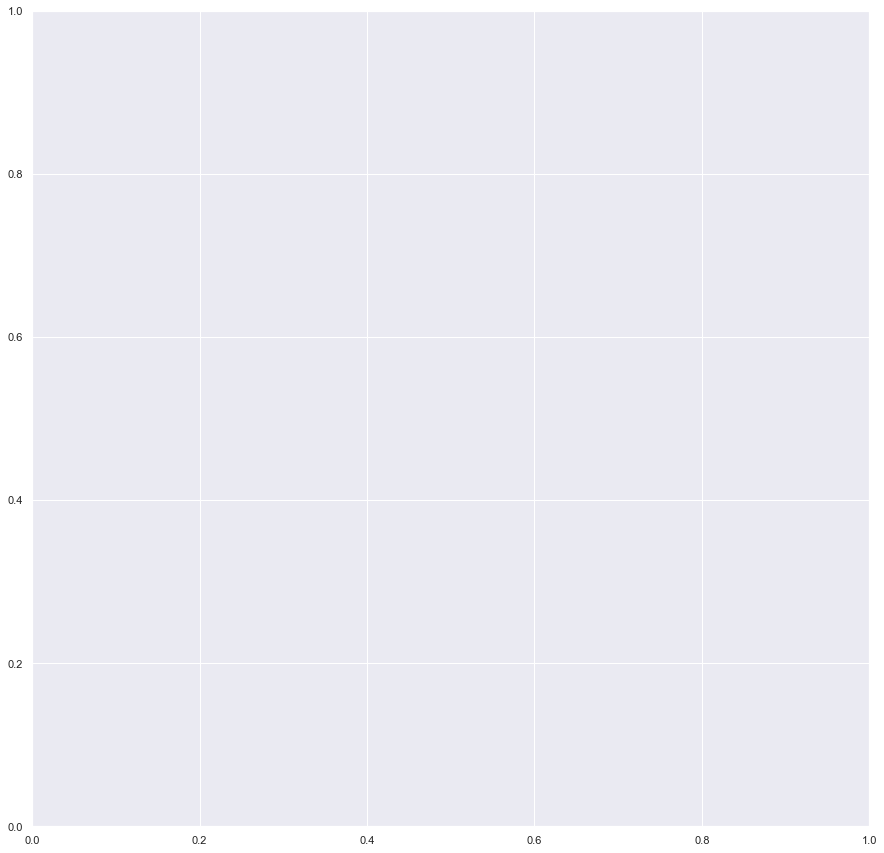

In [40]:
fig, ax = plt.subplots(figsize=(15,15))

ArcDiagram(G, edge_width=0.1, edge_alpha=1)

plt.show()

In [6]:
nx.write_weighted_edgelist(Gs['Sociology'], './link_clustering/weighted.edgelist', delimiter='\t')

# Co-Occurence Graph

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


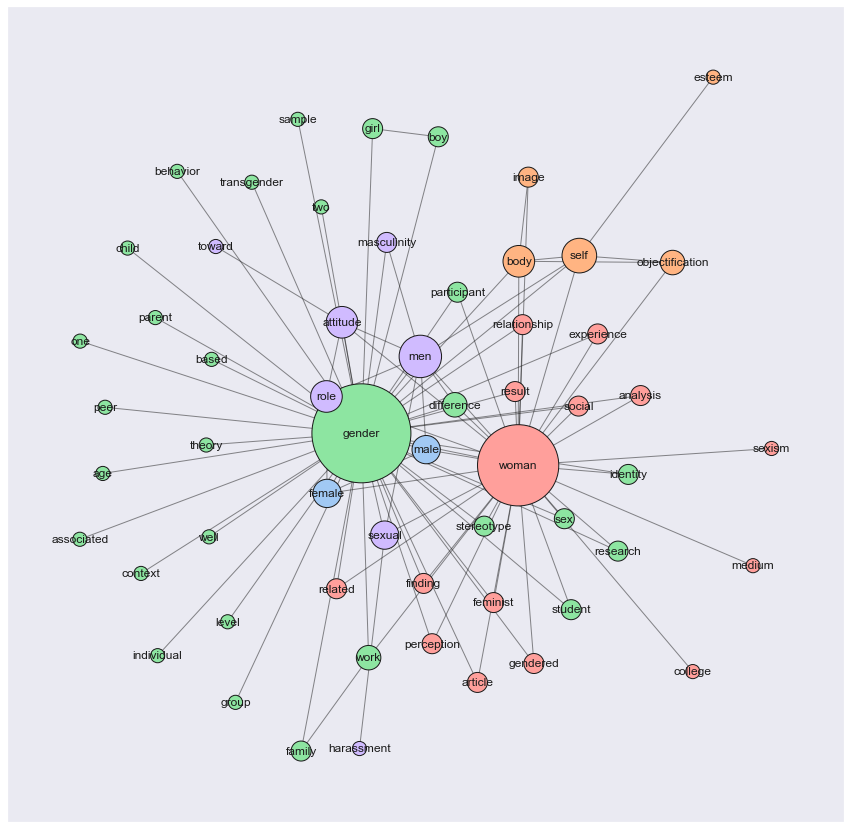

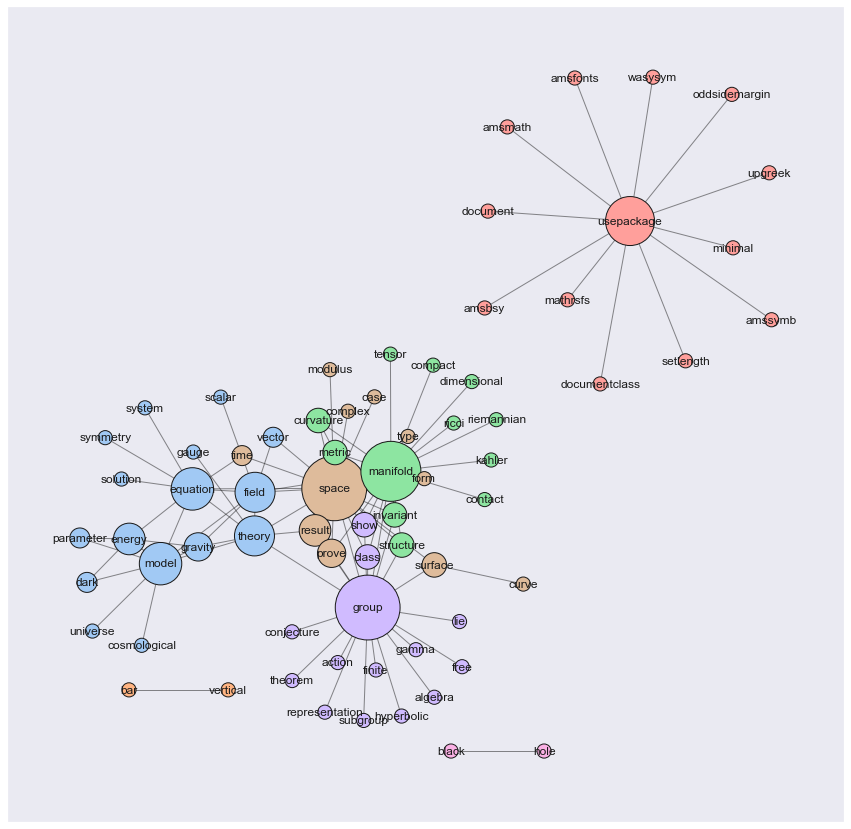

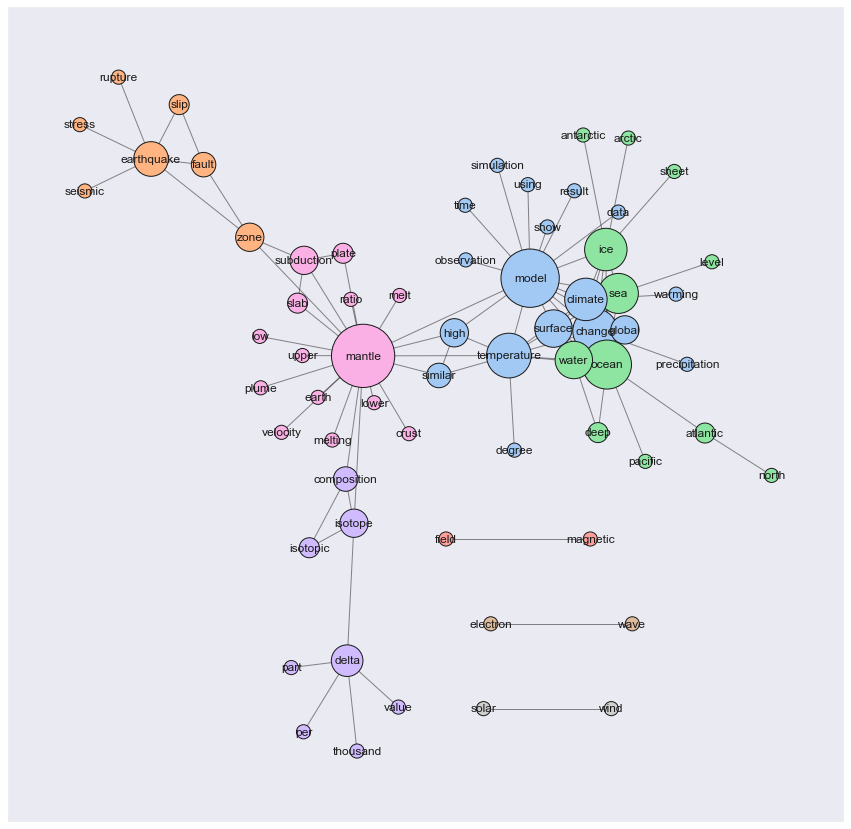

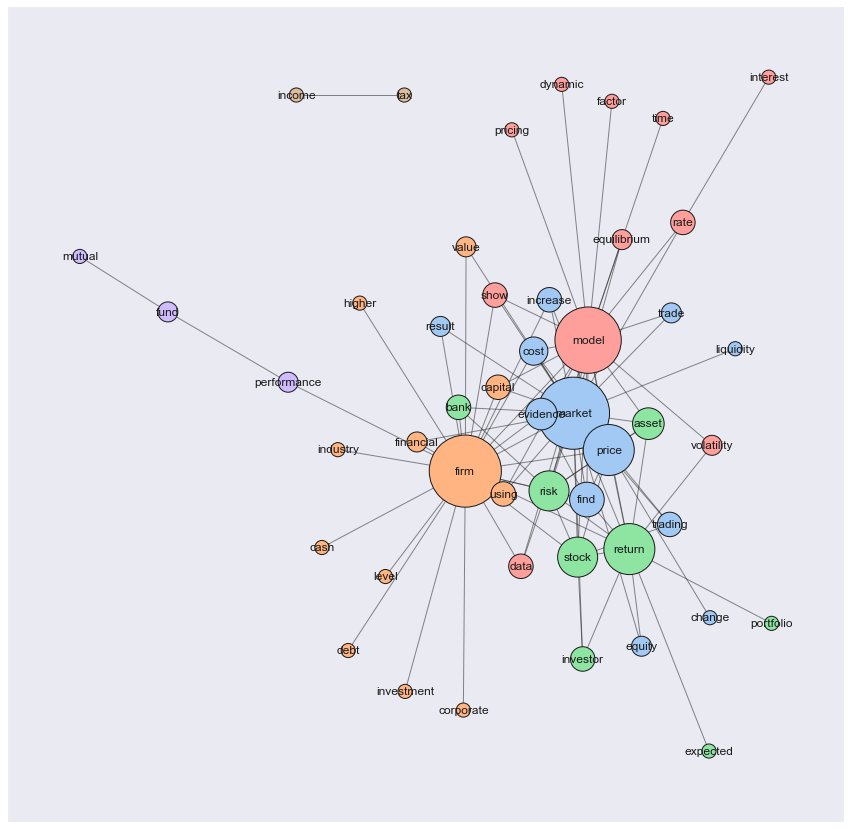

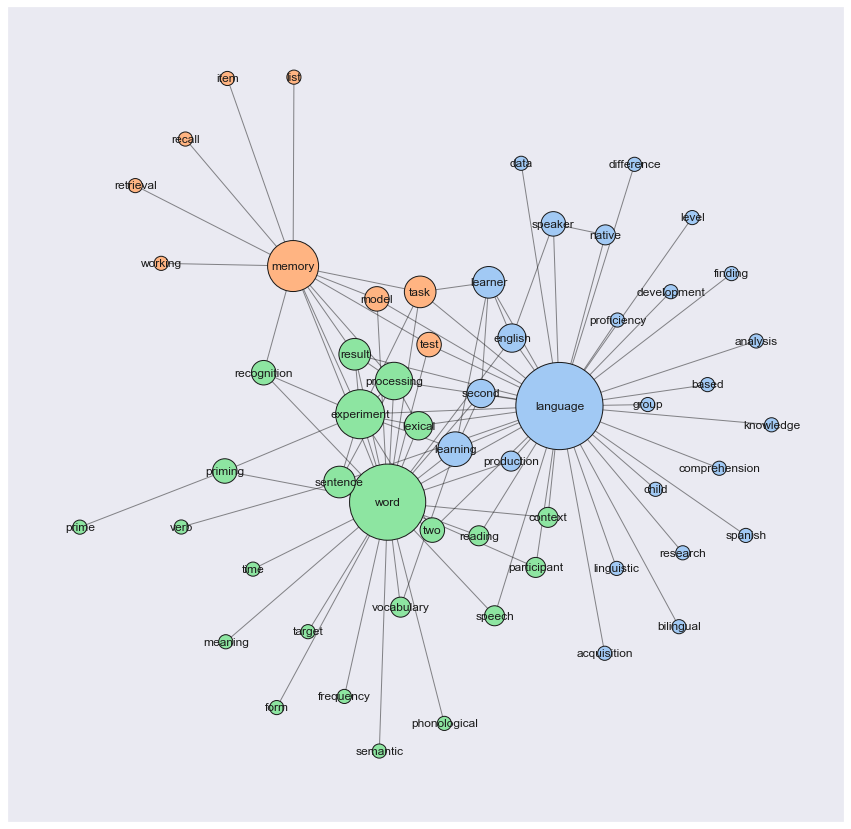

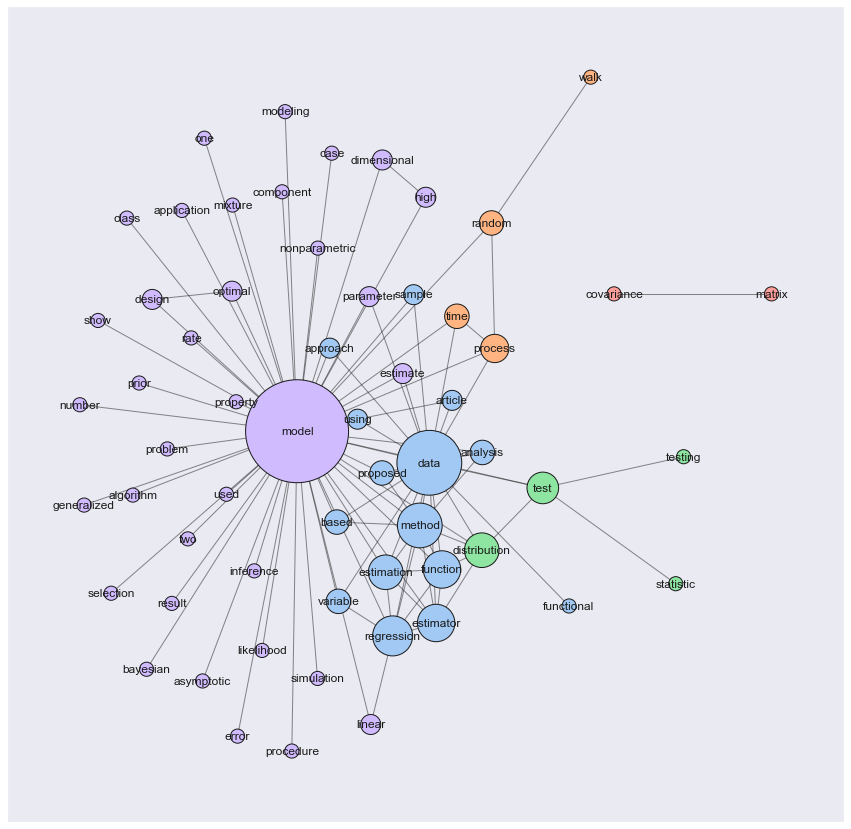

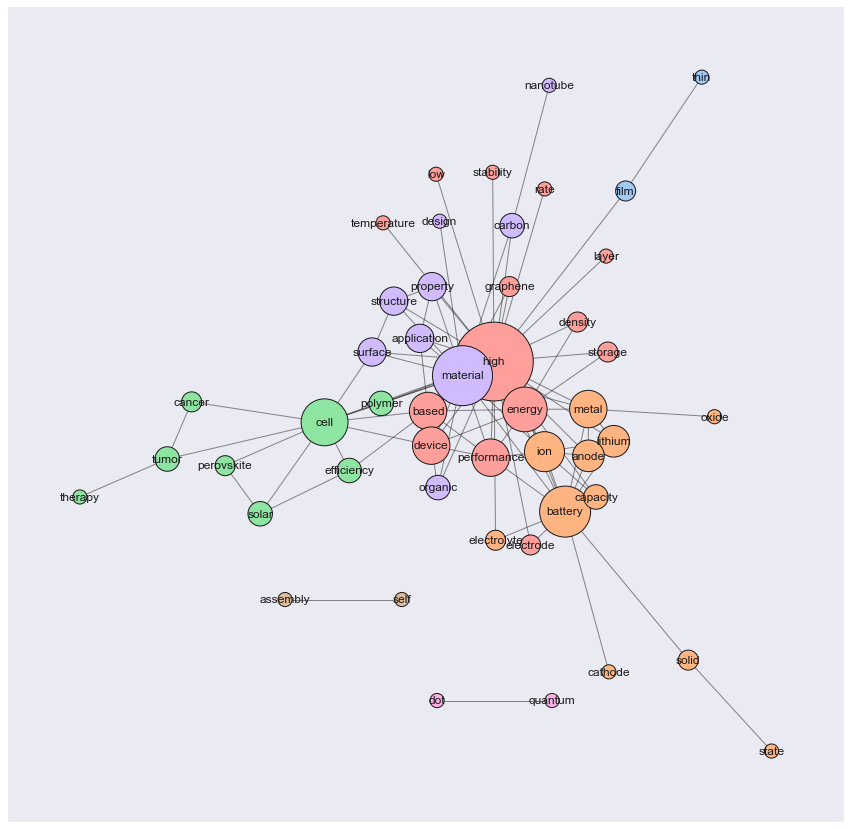

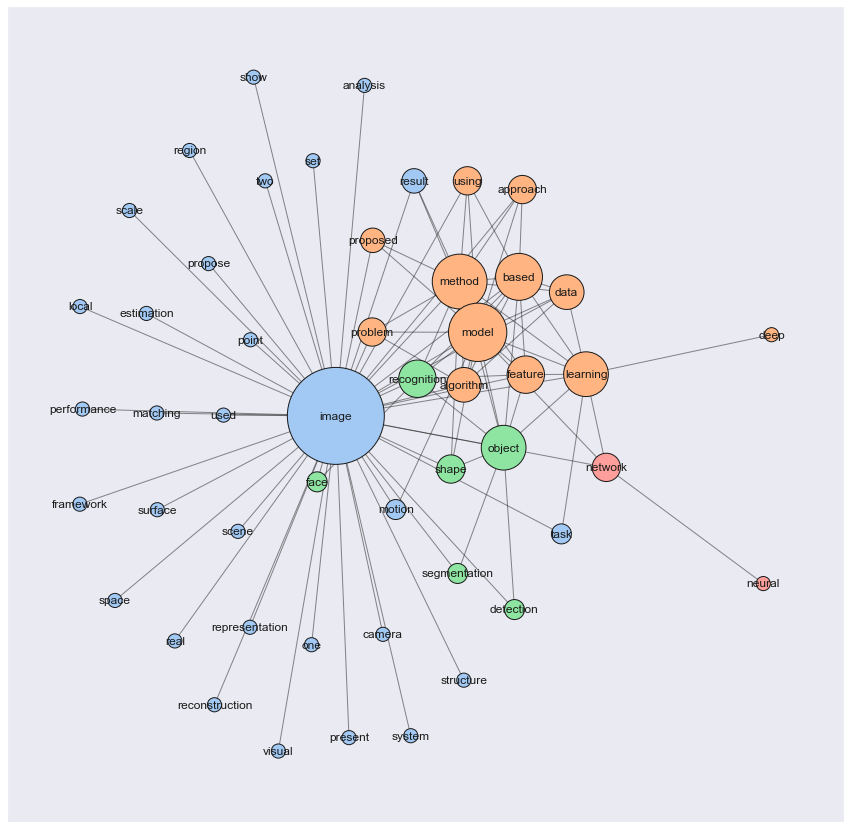

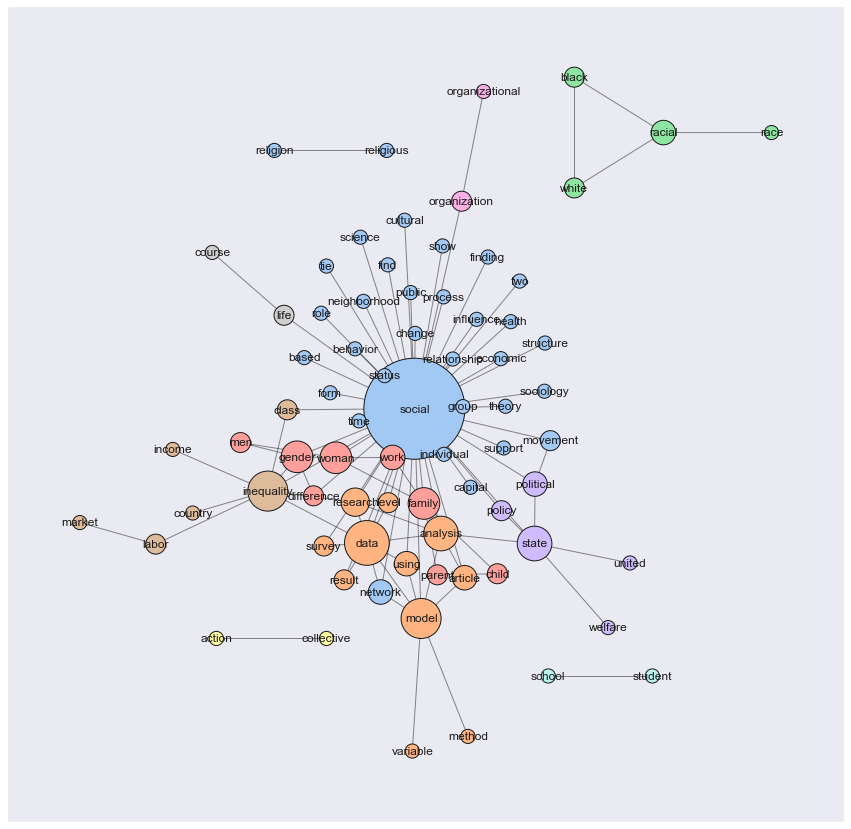

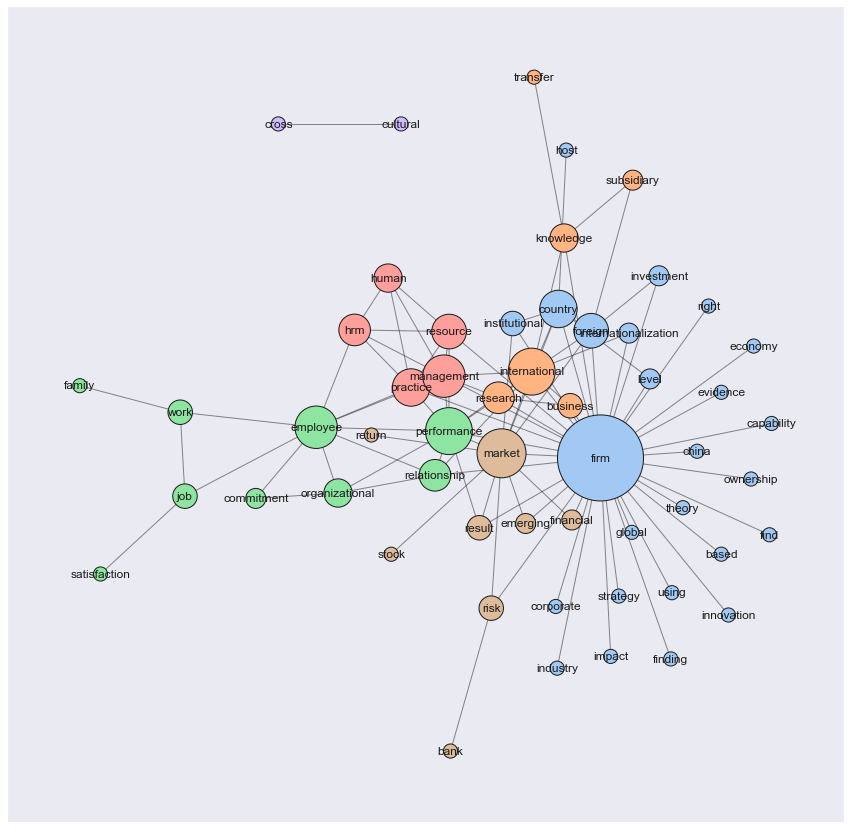

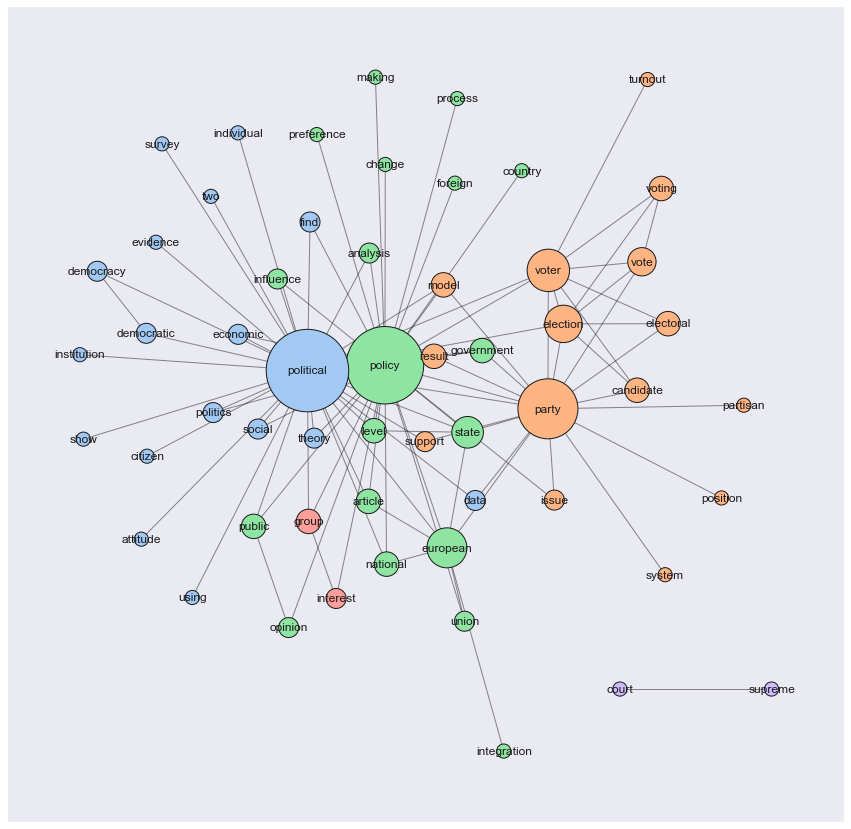

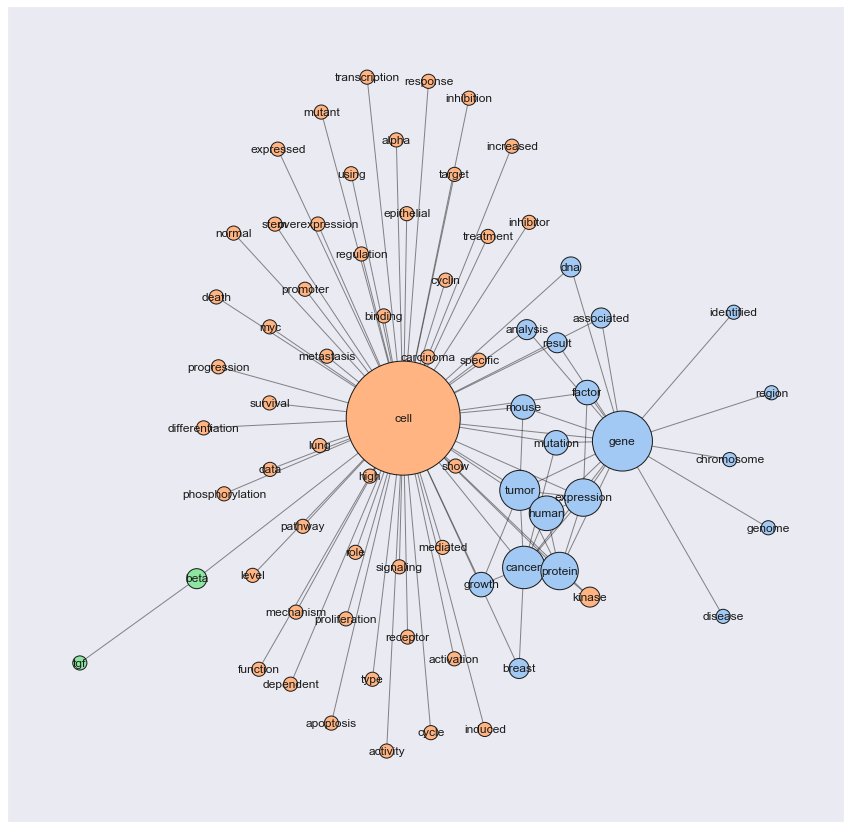

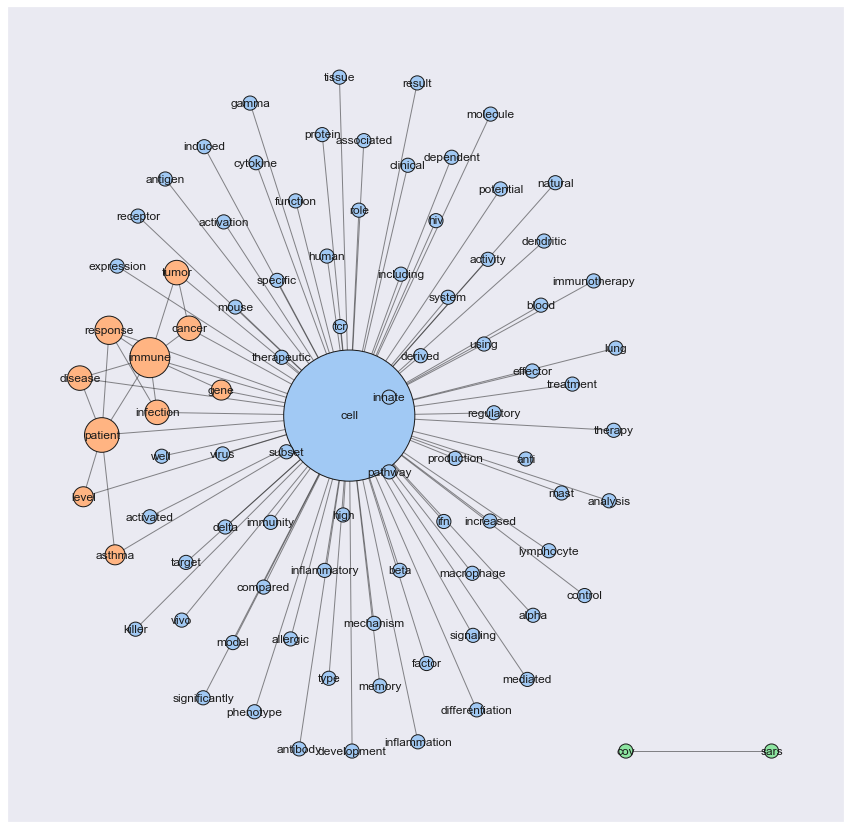

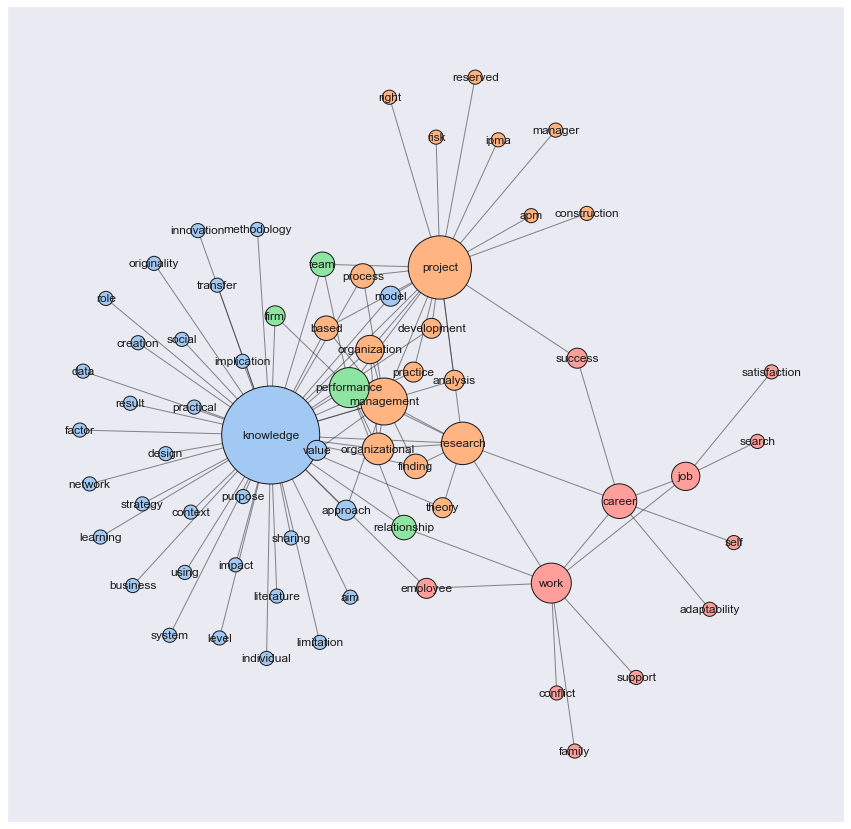

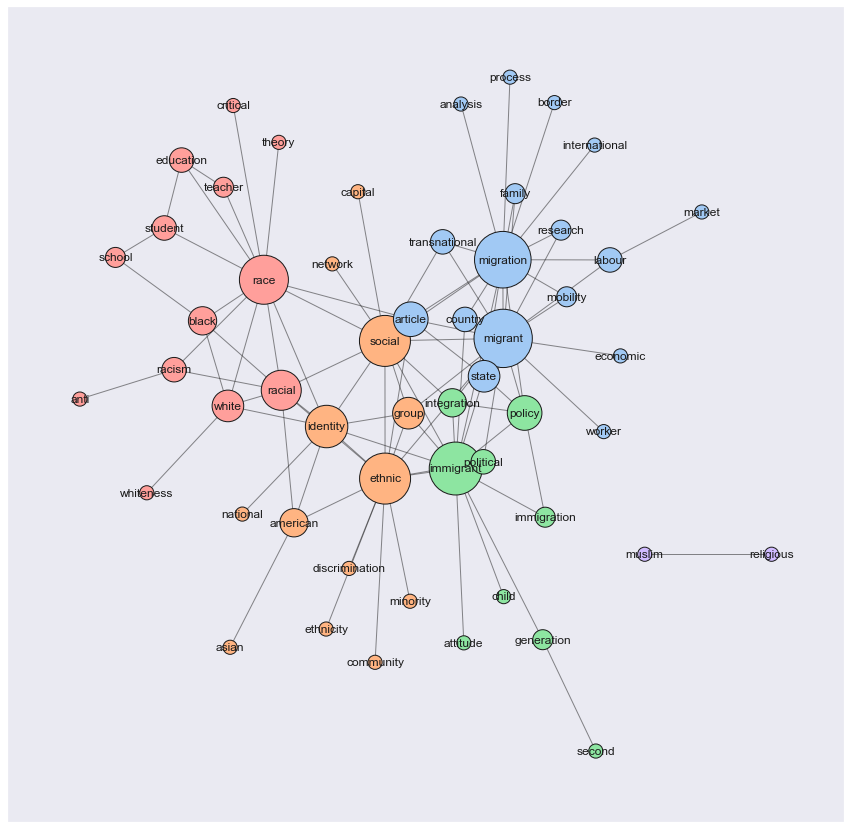

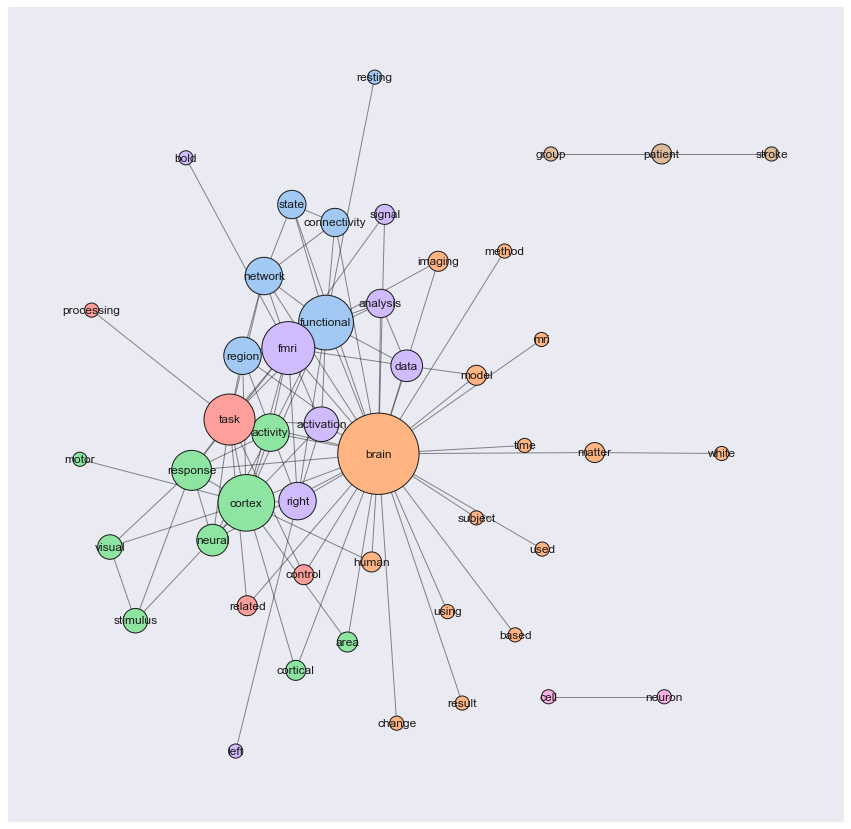

In [8]:
communities=True
co_citation=False

for field_name, G in Gs.items():

    print(field_name)
    
    fig, ax = plt.subplots(1, figsize=(15, 15))

    node_deg = dict(nx.degree(G))
    node_names = list(node_deg.keys())
    node_sizes = list(map(lambda deg: deg*200, node_deg.values()))
    node_labels = dict(zip(node_names, node_names))

    new_node_labels = (
        pl.read_parquet(f'./output/main_dfs/{field_name}.parquet')
        .select(
            pl.col('Doi'), 
            pl.concat_str([
                pl.lit('('),
                pl.col('Authors').arr.first().str.split(', ').arr.first(),
                pl.lit(', '),
                pl.col('Date').dt.year(),
                pl.lit(')')
            ])
        )
        .filter(pl.col('Doi').is_in(node_names))
        .to_numpy()
    )

    new_node_labels = dict(map(tuple, new_node_labels))
    if co_citation:
        node_labels.update(new_node_labels)

    if communities:
        comms = nx_comm.louvain_communities(G)
        palette = sns.color_palette("pastel", len(comms))
        node_color_map = {}
        for comm, color in zip(comms, palette):
            for node in comm:
                node_color_map[node] = color
        node_color = [node_color_map[n] for n in G.nodes]
        node_color

    pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp') # dot, twopi, fdp, sfdp, circo

    nx.draw_networkx_nodes(
        G, 
        pos,
        nodelist=node_names,
        node_size=node_sizes,
        # node_color='#00ABB3',
        node_color=node_color,
        node_shape='o',
        alpha=None,
        cmap=plt.cm.Blues,
        ax=ax,
        linewidths=1.0,
        edgecolors='k',
    ).set_zorder(1)

    nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=node_labels)

    nx.draw_networkx_edges(
        G, 
        pos,
        width=1.0,
        edge_color='k',
        style='solid',
        alpha=0.5,
        arrowsize=10,
        ax=ax,
        nodelist=node_names,
        node_size=node_sizes,
        node_shape='o',
        connectionstyle='arc3',
    ).set_zorder(-1)

    ax.grid(False)

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_graphs', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150 
    )

# Full Co-Occurrence Graphs

In [4]:
corpora = co_occurence_graphs(n_edges=10_000)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 1378 nodes and 10000 edges
Geometry Graph with 983 nodes and 10000 edges
Geophysics Graph with 896 nodes and 10000 edges
Economics Graph with 996 nodes and 10000 edges
Language & Linguistics Graph with 1010 nodes and 10000 edges
Probability & Statistics Graph with 912 nodes and 10000 edges
Material Engineering Graph with 881 nodes and 10000 edges
Artificial Intelligence Graph with 951 nodes and 10000 edges
Sociology Graph with 943 nodes and 10000 edges
International Business Graph with 822 nodes and 10000 edges
Political Science Graph with 1037 nodes and 10000 edges
Genetics & Genomics Graph with 1328 nodes and 10000 edges
Immunology Graph with 1595 nodes and 10000 edges
Human Resources & Organizations Graph with 1054 nodes and 10000 edges
Ethnic & Cultural Studies Graph with 919 nodes and 10000 edges
Neurology Graph with 854 nodes and 10000 edges


Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


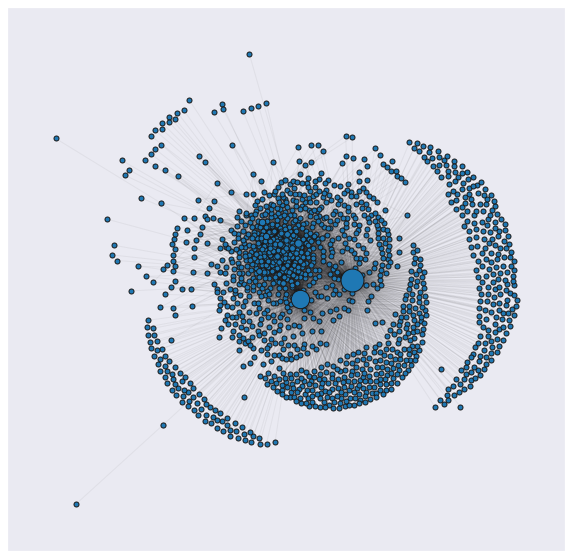

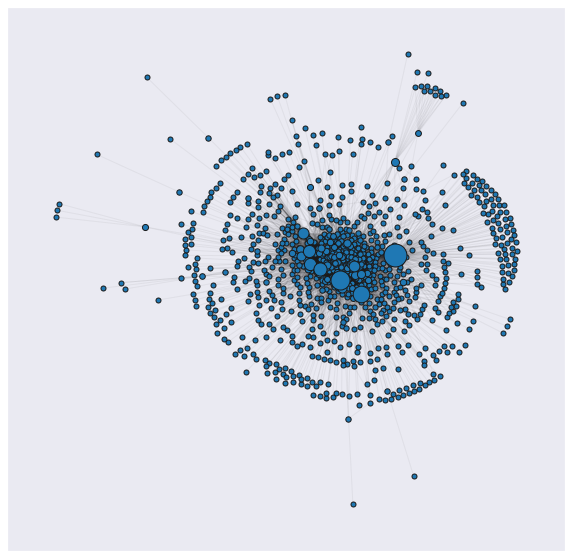

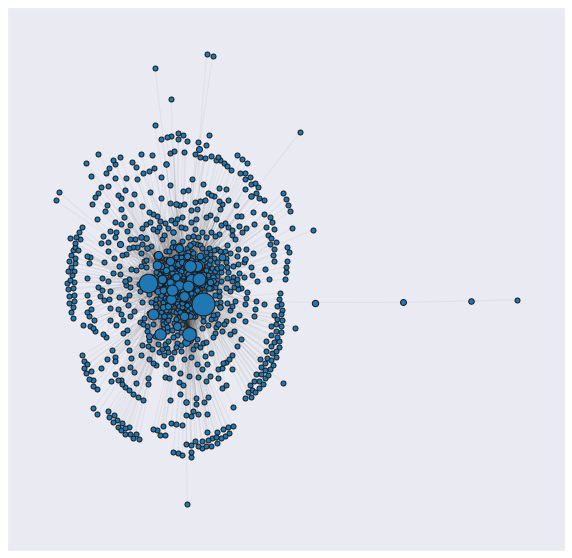

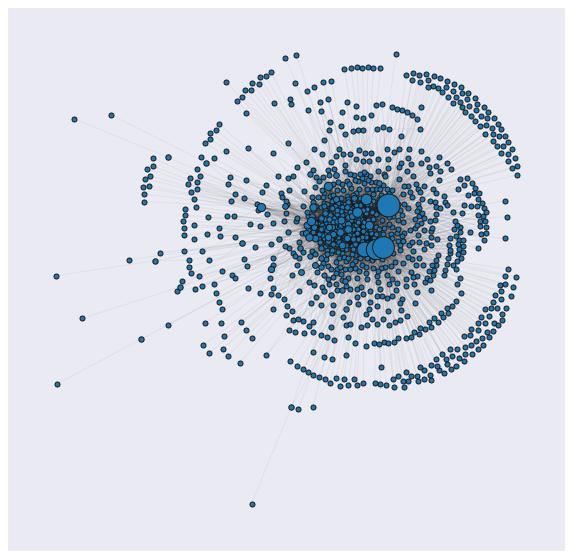

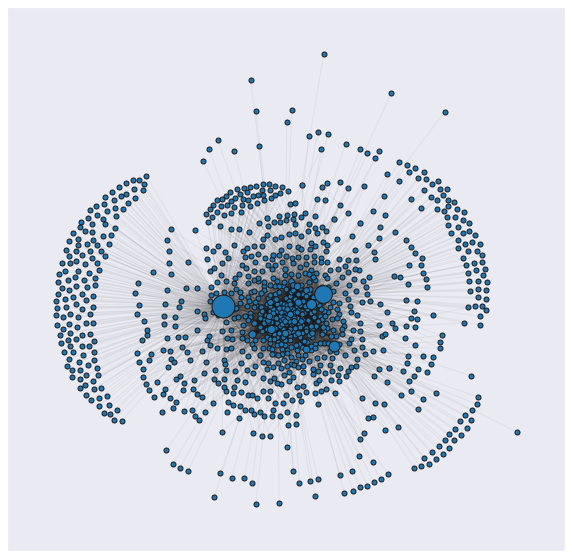

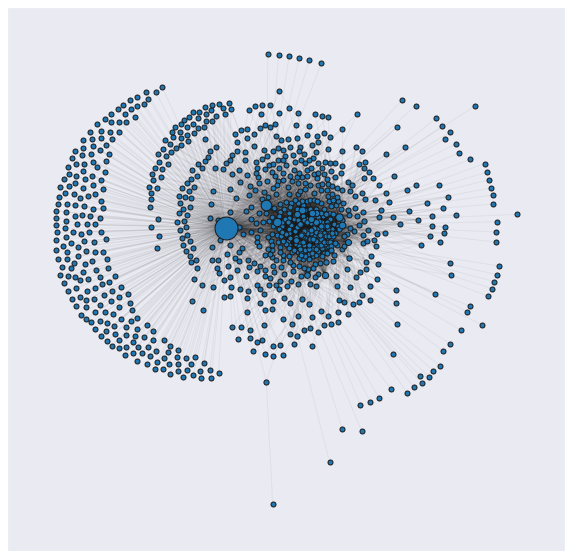

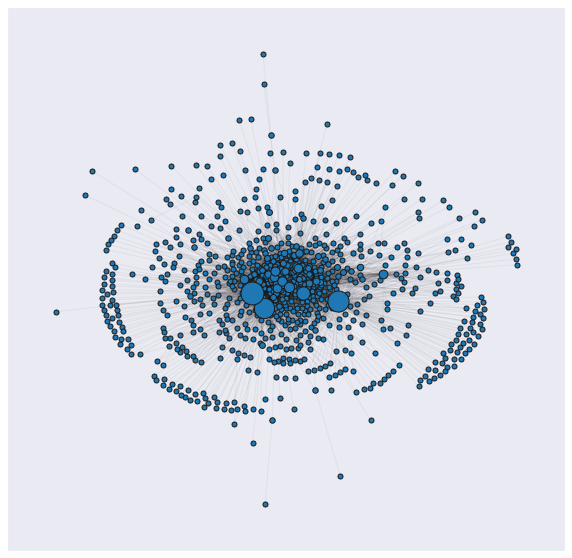

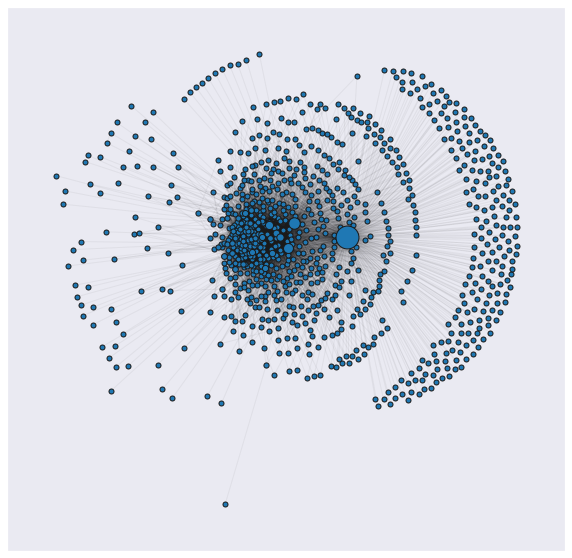

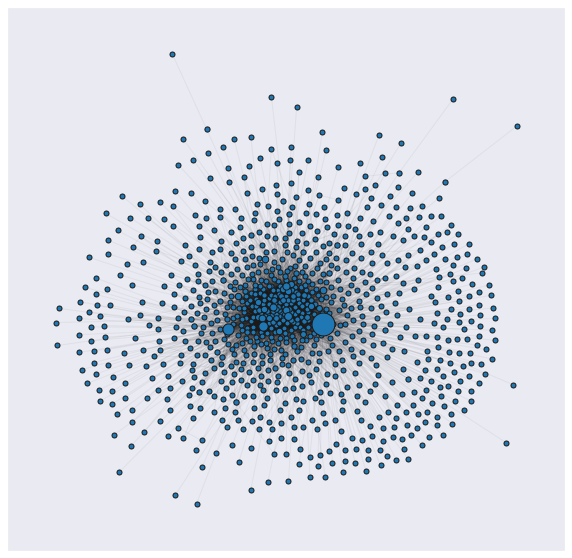

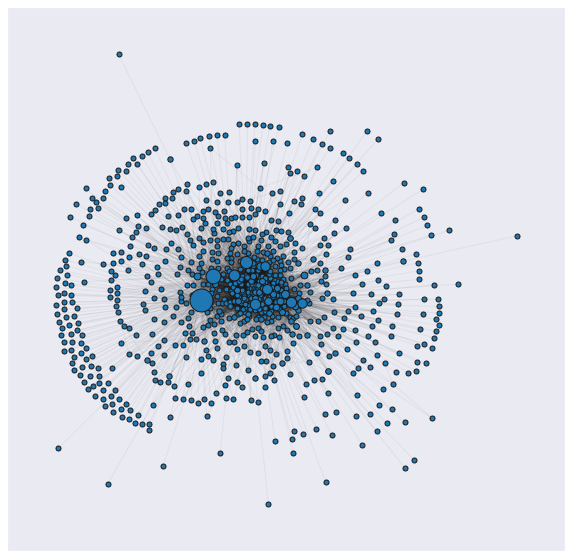

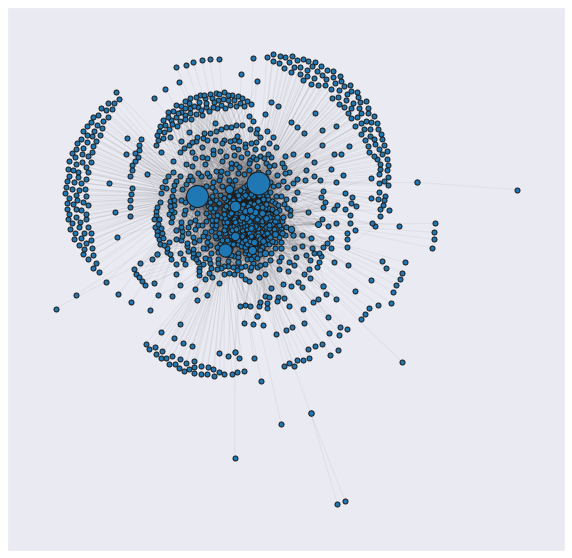

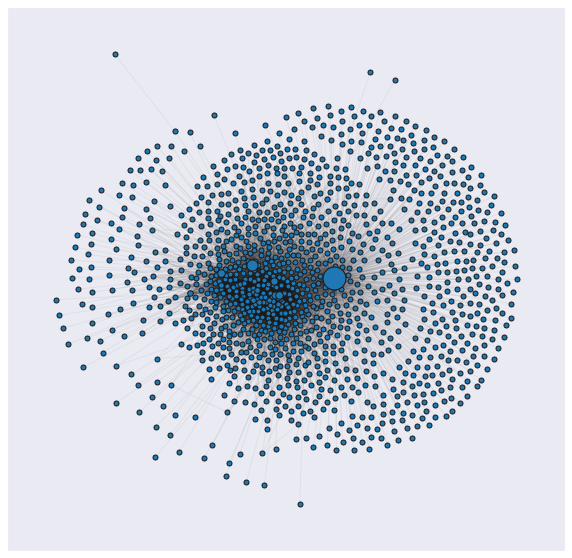

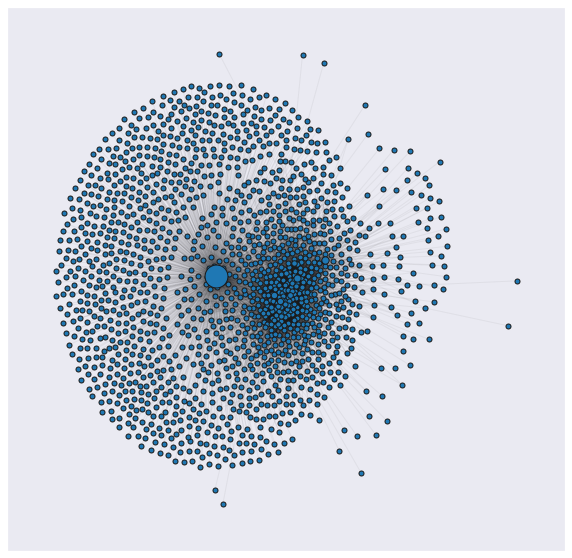

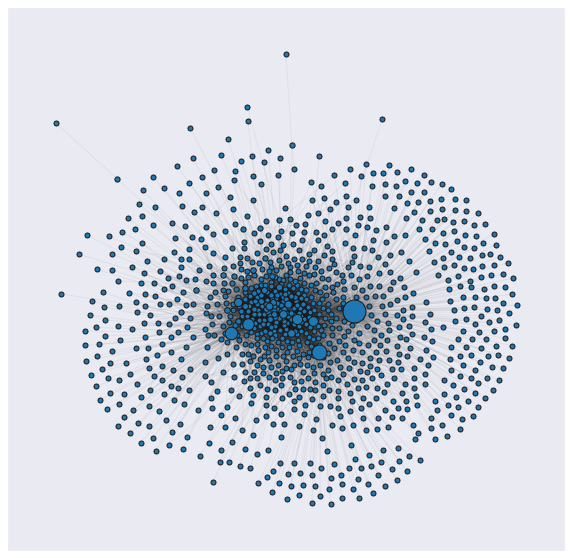

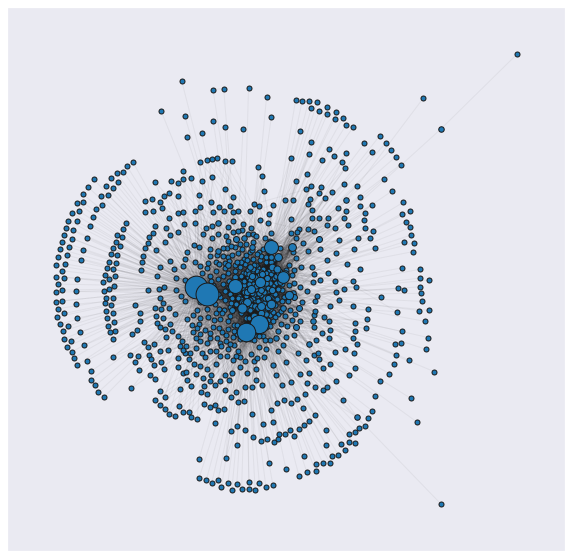

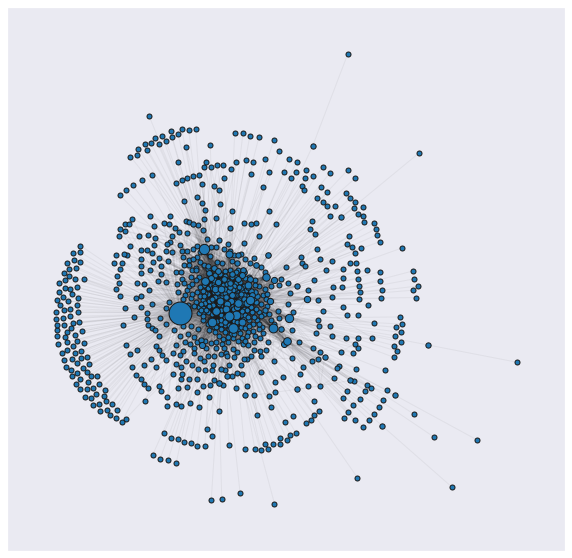

In [7]:
from matplotlib import cm

cmap = cm.plasma
node_factor = 500
# n_cols = 2
# n_rows = np.ceil(len(corpora) / n_cols)

sns.set()

for field_name, G in Gs.items():
    fig, ax = plt.subplots(1, figsize=(10, 10))

    print(field_name)

    G = G.to_undirected()
    G = G.subgraph(max(nx.connected_components(G), key=len))
    cent_map = dict(nx.betweenness_centrality(G))

    sorted_cent_map = dict(sorted(cent_map.items(), key=lambda tup: tup[1]))
    node_list = list(sorted_cent_map.keys())
    node_cent = np.fromiter(sorted_cent_map.values(), float)
    normalized_node_map = dict(zip(node_list, node_cent / node_cent.max()))
    normalized_node_list = list(normalized_node_map.keys())
    normalized_node_cent = np.fromiter(normalized_node_map.values(), float)

    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp") # dot, twopi, fdp, sfdp, circo

    for i, (node, cent) in enumerate(normalized_node_map.items()):
        greater_nodes = nx.draw_networkx_nodes(
            G, 
            pos, 
            nodelist=[node],
            node_size=[cent * node_factor + 25],
            # node_color=[cent],
            node_shape='o',
            alpha=1,
            ax=ax,
            cmap=cmap,
            linewidths=1,
            edgecolors='k',
            margins=None,
        ) 
        greater_nodes.set_zorder(i)

    edges = nx.draw_networkx_edges(
        G, 
        pos,
        width=1.0,
        edge_color='k',
        style='solid',
        alpha=0.05, 
        ax=ax,
        arrows=True,
        nodelist=node_list,
        node_size=node_cent * node_factor,
        node_shape='o',
        connectionstyle='arc3', # , rad=0.3
    )

    # edges.set_zorder(-1)
    for c in edges:
        c.set_zorder(-1)

    ax.grid(False)

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_full_graphs', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150 
    )

# HeatMap

In [10]:
corpora = co_occurence_graphs(n_edges=50)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 33 nodes and 50 edges
Geometry Graph with 36 nodes and 50 edges
Geophysics Graph with 36 nodes and 50 edges
Economics Graph with 32 nodes and 50 edges
Language & Linguistics Graph with 34 nodes and 50 edges
Probability & Statistics Graph with 34 nodes and 50 edges
Material Engineering Graph with 32 nodes and 50 edges
Artificial Intelligence Graph with 29 nodes and 50 edges
Sociology Graph with 46 nodes and 50 edges
International Business Graph with 29 nodes and 50 edges
Political Science Graph with 36 nodes and 50 edges
Genetics & Genomics Graph with 38 nodes and 50 edges
Immunology Graph with 50 nodes and 50 edges
Human Resources & Organizations Graph with 40 nodes and 50 edges
Ethnic & Cultural Studies Graph with 36 nodes and 50 edges
Neurology Graph with 29 nodes and 50 edges


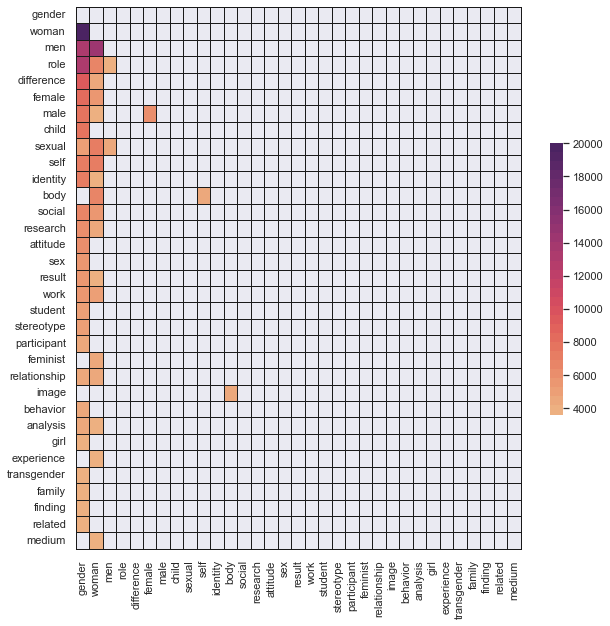

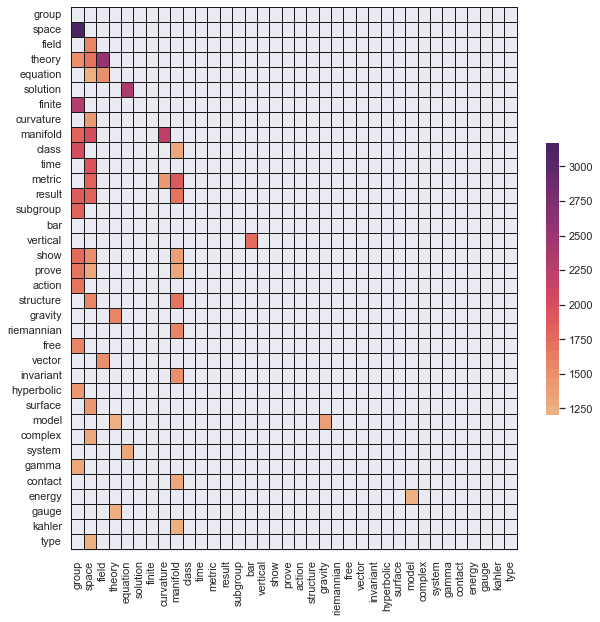

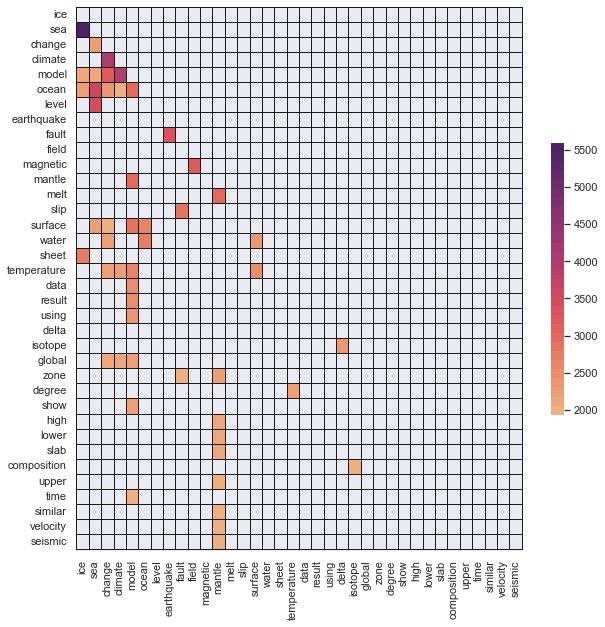

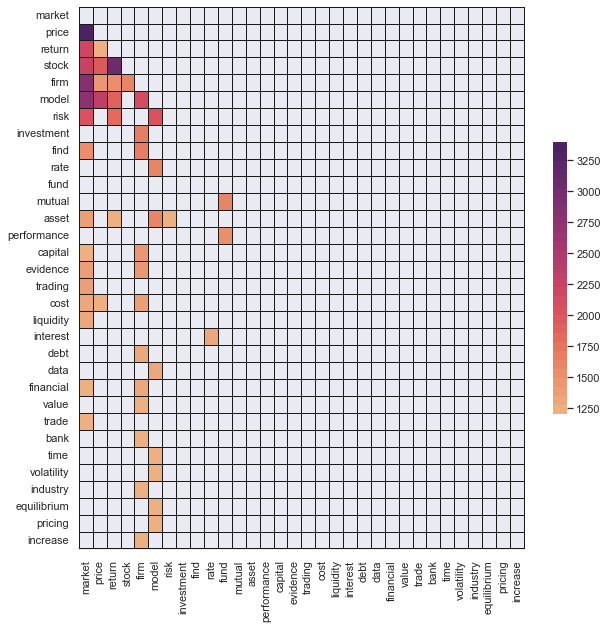

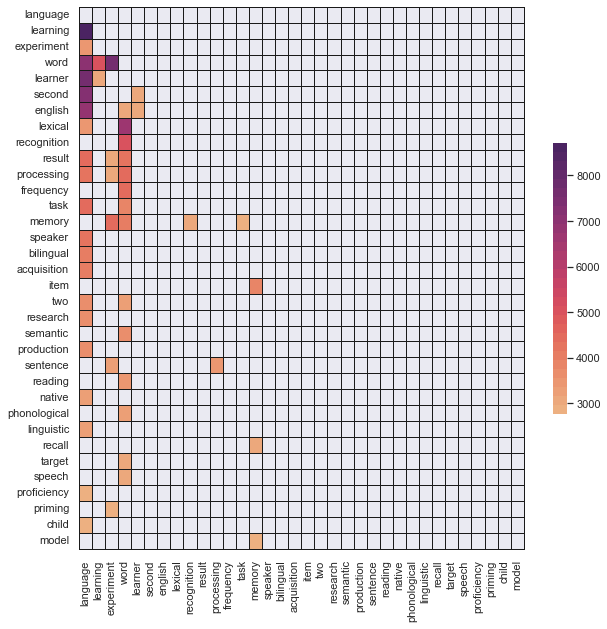

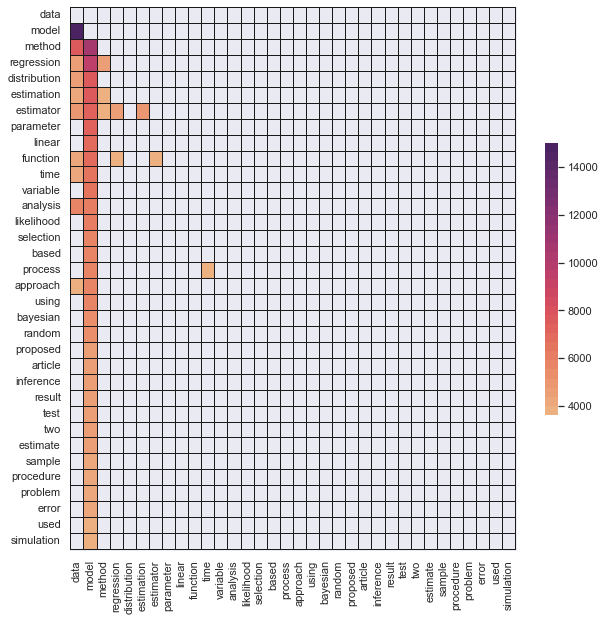

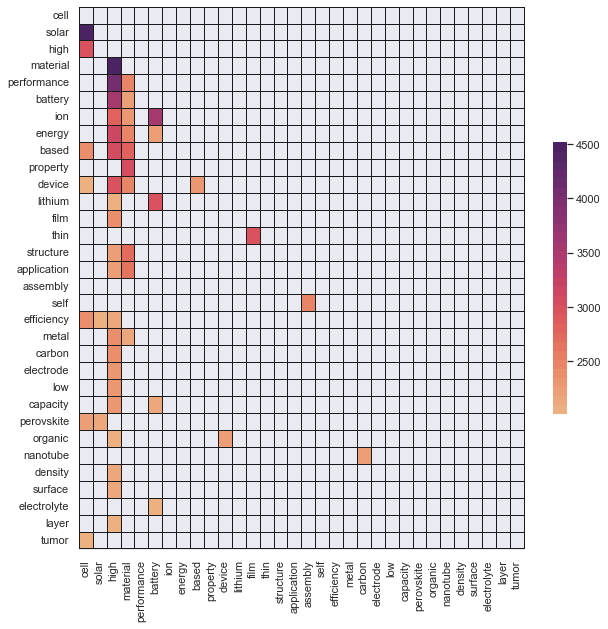

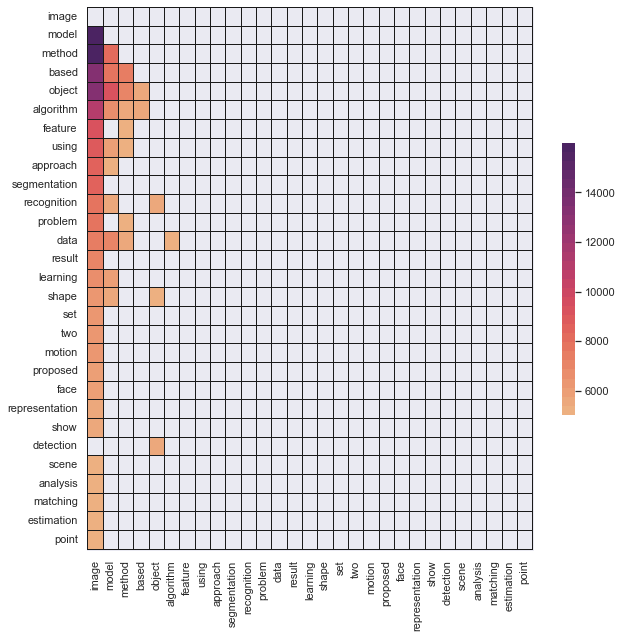

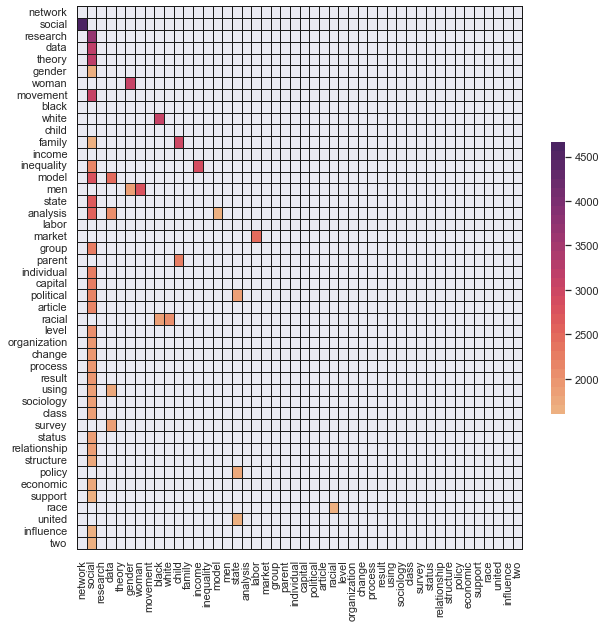

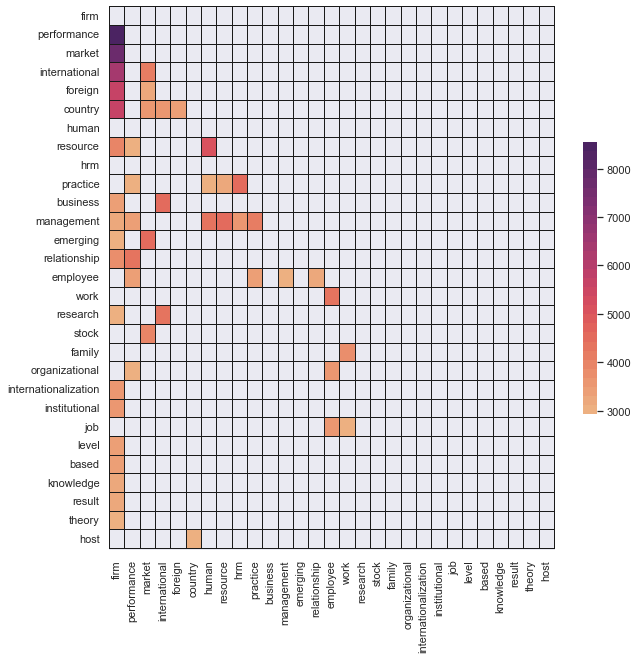

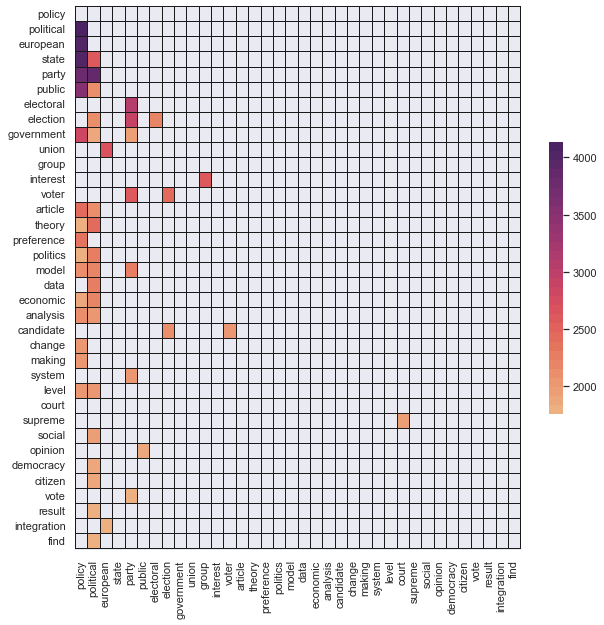

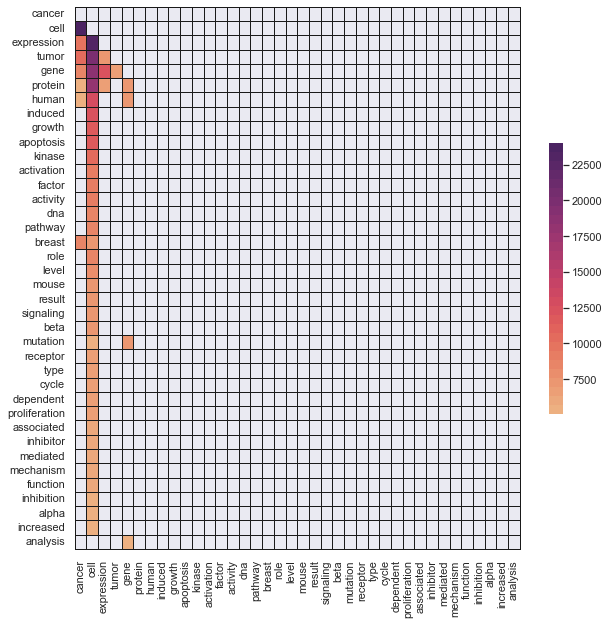

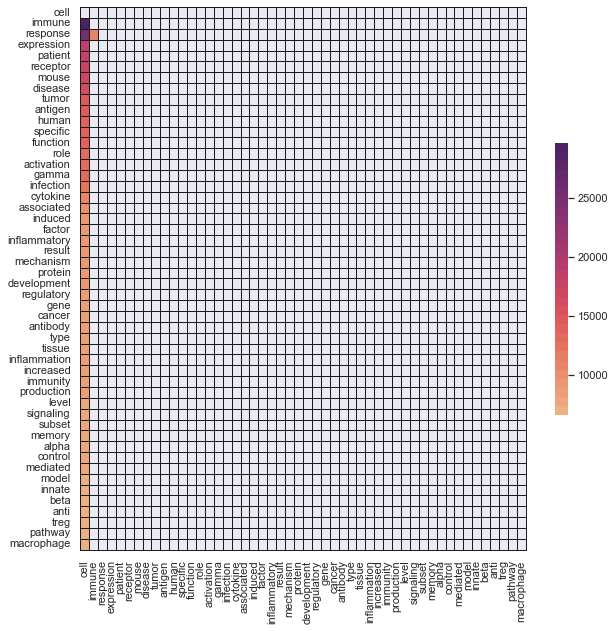

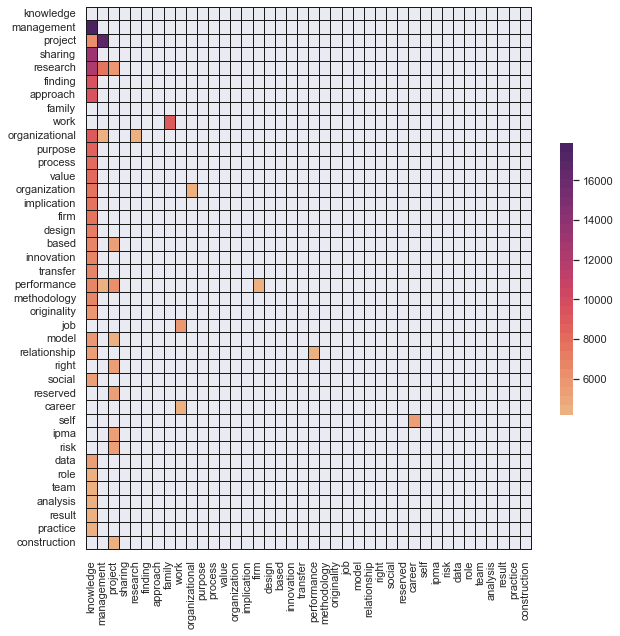

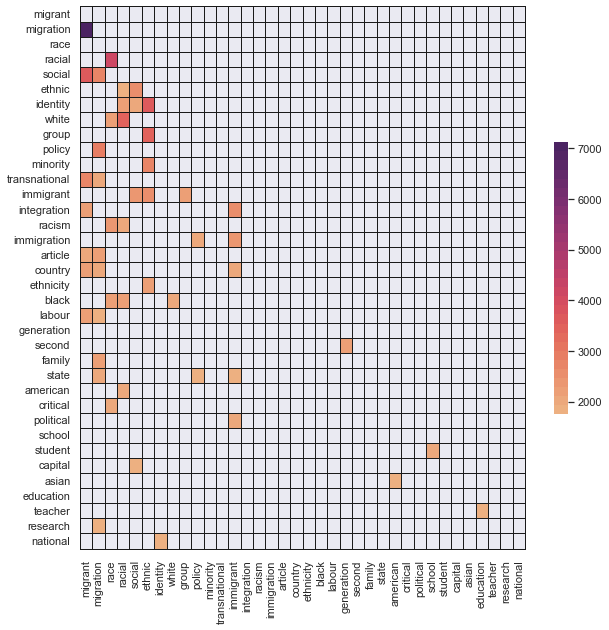

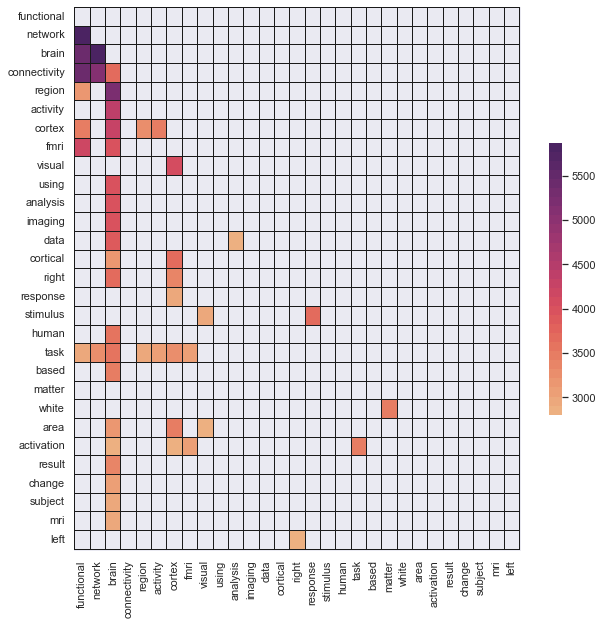

In [11]:
for field_name, G in Gs.items():

    fig, ax = plt.subplots(1, figsize=(10, 10))

    nodes = G.nodes
    am = nx.to_numpy_array(G)
    up_triang = np.triu(np.ones_like(am)).astype(bool)
    cmap = plt.get_cmap('flare',30)
    cmap.set_under('white')
    cmap.set_over('yellow')

    sns.heatmap(am, linewidth=.5, cmap=cmap, linecolor='k', linewidths=0.5, xticklabels=nodes, yticklabels=nodes, mask=(am==0) | (up_triang), ax=ax, cbar_kws={"shrink": 0.5})

    ax.set_xlim(0, len(G) + 0.1)
    ax.set_ylim(len(G) + 0.1, 0)

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_heatmap', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150 
    )


# Clusters

In [ ]:
# Fragmentation 

In [6]:
communities = {}
for field_name, G in Gs.items():
    communities[field_name] = nx_comm.louvain_communities(G)

In [7]:
{field_name: len(comms) for field_name, comms in communities.items()}

{'Gender Studies': 4,
 'Geometry': 7,
 'Geophysics': 9,
 'Economics': 6,
 'Language & Linguistics': 3,
 'Probability & Statistics': 6,
 'Material Engineering': 7,
 'Artificial Intelligence': 4,
 'Sociology': 11,
 'International Business': 6,
 'Political Science': 4,
 'Genetics & Genomics': 3,
 'Immunology': 3,
 'Human Resources & Organizations': 4,
 'Ethnic & Cultural Studies': 5,
 'Neurology': 7}